In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot, colors
from ipywidgets import interact

In [ ]:
os.getcwd()

In [24]:
root = '/opt/ml/input'
dataset_path = "data"
file = pd.read_csv('../../submission/make_pseudo_anns(512)_SeMask-FAPN_trash_dataV1_WarmupPolyLR_1e-5-model_best_31199iter_fold-0.csv')

In [ ]:
for i in range(10):
    row = file.iloc[i]
    # print(row)


In [21]:
PALLETE = [[  0,   0,   0], [128,   0,   0], [  0, 128,   0], [128, 128,   0],
           [  0,   0, 128], [128,   0, 128], [  0, 128, 128], [128, 128, 128],
           [ 64,   0,   0], [192,   0,   0],[ 64, 128,   0]]

import os
from os import path as osp

interactive(children=(Dropdown(description='i', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…

<function __main__.show_img(i)>

In [8]:
img_dir ='../../data/dataV0/'
data_root = '../../submission/hornet'
file_name = [f'fold-{i}_ensemble' for i in range(5)]
#file_name= ['fold3_ensemble', 'no4_fold3_ensemble', 'no24_fold3_ensemble']
file_name.append('team_best')
len_file = len(file_name)

file = [pd.read_csv(osp.join(data_root, file_name[i] + '.csv')) for i in range(len_file)]
classes = [
    "Background",
    "General trash",
    "Paper",
    "Paper pack",
    "Metal",
    "Glass",
    "Plastic",
    "Styrofoam",
    "Plastic bag",
    "Battery",
    "Clothing",
]

PALLETE = [[  0,   0,   0], [128,   0,   0], [  255, 0,   0], [0, 128,   0],
           [  0,   255, 0], [0,   0, 128], [  0, 0, 255], [128, 128, 128],
           [ 128,  128,   0], [0,   128,   128],[ 128, 0,   128]]


In [9]:

def get_pred(kfold,i):
    row = file[kfold].iloc[i]
    img_id = row['image_id']
    
    
    pred = row['PredictionString']
    pred = np.array(pred.split(' '))
    pred = np.array(list(map(lambda x: PALLETE[int(x)], pred)))
    pred = pred.reshape((512,512,3))
    print(img_id)
    pyplot.imshow(pred)

def show_img(i):
    row = file[0].iloc[i]
    preds = [get_pred(k, i) for k in range(len_file)]
    
    img_id = row['image_id']
    img = cv2.imread(osp.join(img_dir, img_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, [256, 256])
    

    fig = pyplot.figure(figsize=(20,15))
    gs_img = fig.add_gridspec(nrows=1, ncols = 1, left = 0, right = 0.4, top = 1, bottom=0.7)
    gs_color = fig.add_gridspec(nrows=1, ncols = 1, left = 0.4, right = 1, top = 1, bottom=0.7)
    gs_pred = fig.add_gridspec(nrows=2, ncols = len_file, left = 0, right = 1,top = 0.6, bottom=0)
    
    pyplot.subplot(gs_img[0,0])
    pyplot.title(img_id)
    pyplot.axis('off')
    pyplot.imshow(img)
    
    pyplot.subplot(gs_color[0,0])
    pyplot.title(data_root)
    pyplot.barh(classes, [1 for _ in range(11)], color = [colors.to_hex([v /256 for v in color]) for color in PALLETE])
    pyplot.gca().axes.xaxis.set_visible(False)
    ax = pyplot.gca()
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    #pyplot.show()
    
    #print just pred
    for file_num in range(len_file):
        pyplot.subplot(gs_pred[0,file_num])
        pyplot.axis('off')
        pyplot.title(file_name[file_num])
        pyplot.imshow(preds[file_num])

        pyplot.subplot(gs_pred[1,file_num])
        pyplot.axis('off')
        pyplot.title(file_name[file_num] + 'Mix')
        pyplot.imshow(img)
        pyplot.imshow(preds[file_num], alpha=0.5)

interact(show_img, i=range(819))

interactive(children=(Dropdown(description='i', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…

<function __main__.show_img(i)>

int64


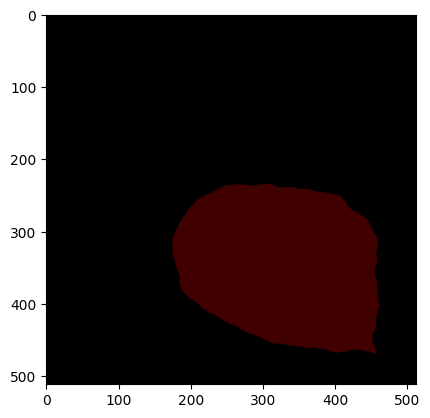

In [34]:
pred = file["PredictionString"][0]
anns = np.array(pred.split(" "))
anns = np.array(list(map(lambda x: PALLETE[int(x)], anns)), dtype=np.unit8)
anns = anns.reshape((512, 512, 3))

print(anns.dtype)
pyplot.imshow(anns)

In [31]:
for index, (image, pred) in enumerate(zip(file["image_id"], file["PredictionString"])):
    anns = np.array(pred.split(' '))
    anns = np.array(list(map(lambda x: PALLETE[int(x)], anns)), dtype=np.uint8)
    anns = anns.reshape((512, 512, 3))
    if index == 10:
        print(anns.dtype)
    if not os.path.exists(os.path.join(root, dataset_path, 'pseudo_annotations')):
        os.mkdir(os.path.join(root, dataset_path, 'pseudo_annotations'))
    anns = anns[:,:,::-1]
    cv2.imwrite(os.path.join(root, dataset_path, 'pseudo_annotations', f'pseudo_{index:04}.png'), anns)


In [29]:
for index, image in enumerate(file["image_id"]):
    temp_image = cv2.imread(os.path.join(root, dataset_path, image))
    if not os.path.exists(os.path.join(root, dataset_path, 'pseudo_images')):
        os.mkdir(os.path.join(root, dataset_path, 'pseudo_images'))
    temp_image = temp_image[:,:,::-1]
    cv2.imwrite(os.path.join(root, dataset_path, 'pseudo_images', f'pseudo_{index:04}.jpg'), temp_image)
